In [2]:
# Essentials 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

# Encode labels
from sklearn import preprocessing

# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [4]:
mushrooms = pd.read_csv(r"C:\Users\aaabh\Downloads\mushrooms\mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
target = mushrooms[['class']]
see_no_evil = mushrooms.drop(['class'], axis=1)
see_no_evil.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
see_no_evil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
see_no_evil.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
data = see_no_evil.drop(['veil-type'],axis=1)

In [ ]:
# Preprocessing

In [9]:
encoder = preprocessing.LabelEncoder()
encoded_data = data.apply(encoder.fit_transform)
encoded_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
# Train the Model

In [10]:
!pip install kmodes

In [11]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=2, init='Cao', verbose=1)
clusters = km.fit_predict(encoded_data)
predicted_labels = pd.DataFrame(clusters, columns=['predicted-label'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 175, cost: 62644.0


<AxesSubplot:ylabel='None'>

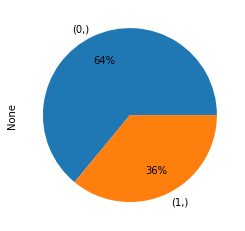

In [12]:
predicted_labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [13]:
data['predicted-labels'] = clusters

In [14]:
encoded_target = target.apply(encoder.fit_transform)
print(f'in this encoding, {encoded_target.iloc[0].values} represents {target.iloc[0].values}')

in this encoding, [1] represents ['p']


In [15]:
labels = pd.DataFrame()
labels['target'] = encoded_target.values.reshape(1, -1).tolist()[0]
labels['prediction'] = clusters
labels.value_counts(["target", "prediction"])

target  prediction
0       0             4198
1       1             2914
        0             1002
0       1               10
dtype: int64

hmmm... it seems that our predicted labels are aligned with the target labels. which means, Class 0 = `e` and Class 1 = `p`. 

This is how we calculate rand index using sklearn:

In [16]:
ri = rand_score(encoded_target.values.reshape(1, -1)[0], clusters)
ari = adjusted_rand_score(encoded_target.values.reshape(1, -1)[0], clusters)

print(f'Rand Index: {ri}')
print(f'Adjusted Rand Index: {ari}')

Rand Index: 0.781869754494126
Adjusted Rand Index: 0.563699537027246


In [ ]:
# Confusion Matrix

Text(0.5, 15.0, 'Predicted Labels')

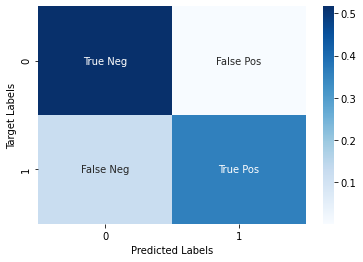

In [17]:
cf_matrix = confusion_matrix(encoded_target.values.reshape(1, -1)[0], clusters)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

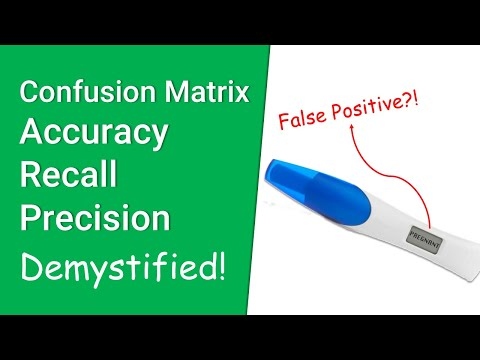

In [18]:
from IPython.display import YouTubeVideo

YouTubeVideo('-ORE0pp9QNk')

In [19]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))

In [20]:
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.8754308222550468
Recall: 0.7441266598569969
Precision: 0.9965800273597811
F1_score: 0.8520467836257309


Finally, I add the clusters to the dataset and save it as output.

In [21]:
mushrooms['clusters'] = clusters
mushrooms.to_csv('./results.csv')